# Data Exploration

## Setup

### Imports

In [1]:
import os
import os.path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Get the data

In [2]:
# load the dataset into a dataframe
data_file_folder = 'data'
data_file_name = 'cardio_data.csv' 
data_df = pd.read_csv(os.path.join('..' , data_file_folder, data_file_name), sep=';') 

## Getting an Overview

In [3]:
#print dataset to get an overview
data_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


- 70000 entries
- 13 attributes
    - id
    - age (in days)
    - gender (1: women, 2: men)
    - height (in cm)
    - weight (in kg)
    - ap_hi (Systolic blood pressure)
    - ap_lo (Diastolic blood pressure)
    - cholesterol (1: normal, 2: above normal, 3: well above normal)
    - gluc (1: normal, 2: above normal, 3: well above normal)
    - smoke (whether patient smokes or not)
    - alco (binary feature)
    - active (binary feature)
    - cardio (target variable, binary)

In [4]:
data_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


- age (round off)
    - jungest person: 29 years old
    - oldest person: 64 years old
    - average: 53 years old 
- height
    - largest person: 2.5m -> very tall for a person -> outlier
    - smallest person: 0.55m -> very small for a person not suffering from dwarfism -> outlier
    - average: ~1.64m
- weight
    - max: 200kg
    - min: 10kg -> outlier
- neg. values for the bloodpressure make no sense -> outliers



In [5]:
#datatype exploration
data_df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### Missing Values

In [6]:
#missing data
missing_values = data_df.isnull().sum()
missing_data = pd.concat([missing_values], axis=1, keys=['Total'])
missing_data

,Total
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


There are no missing values.

### Duplicates

In [7]:
#count duplicates

#consider all columns except id since it is a unique identifier
duplicates = data_df.duplicated(data_df.columns.drop('id'))

#only count rows of value 'true'
true_counts = sum(duplicates)

print("Number of duplicates:{}".format(true_counts))

Number of duplicates:24


## Correlation Matrix

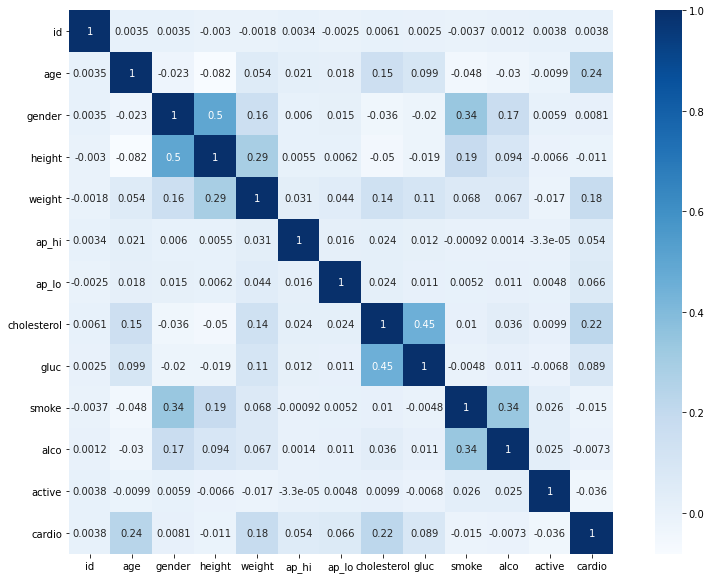

In [8]:
corrmat = data_df.corr()
x, y = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat,square=True, cmap="Blues",annot=True);

Rather high correlations between:
- gender & height
- gluc & cholesterol
- gender & smoke
- alco & smoke 
- weight & height 

## Dependencies

### Scatter Plot

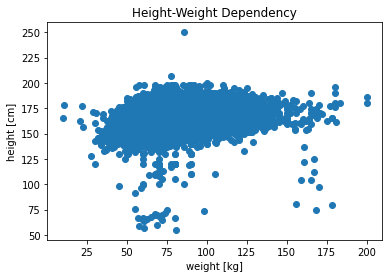

In [9]:
# create a scatter plot with the weight column on the x-axis and the height column on the y-axis
plt.scatter(data_df['weight'], data_df['height'])
plt.title('Height-Weight Dependency')
plt.xlabel('weight [kg]')
plt.ylabel('height [cm]')

# show the plot
plt.show()

This shows again that there are a few outliers within the attributes height and weight.

### Histogram

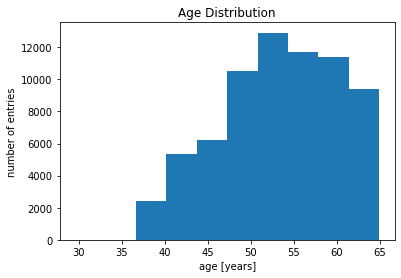

In [10]:
# age in years
plt.hist(data_df['age']/365)
plt.title('Age Distribution')
plt.xlabel('age [years]')
plt.ylabel('number of entries')
plt.show()

Most people in the dataset are roughly between 50 and 60 years old.

### Dropping columns hindering the analysis

In [11]:
#extract labels from dataset
labels = data_df.columns

#drop labels that are not intersting to analyse in plots
labels = labels.drop('id')
data_df = data_df.drop(['id'],axis=1)

### Boxplots for all attributes

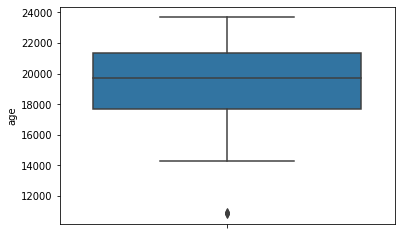

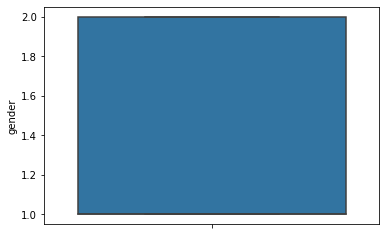

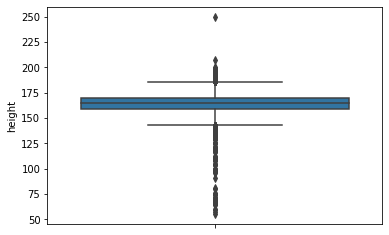

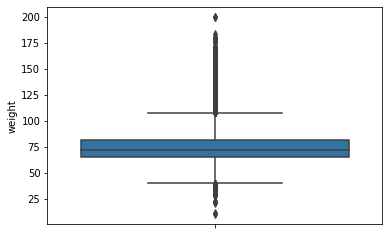

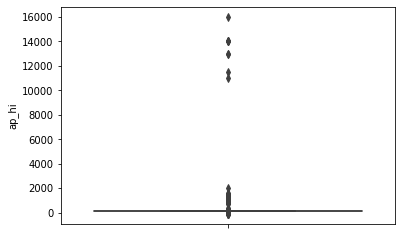

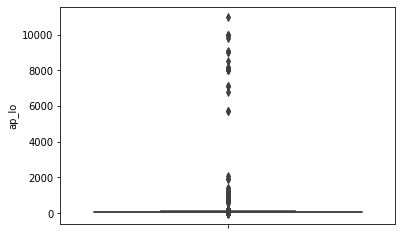

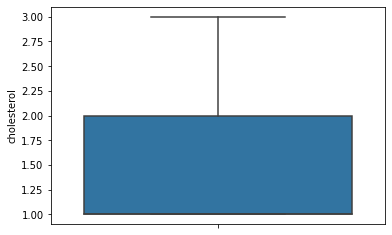

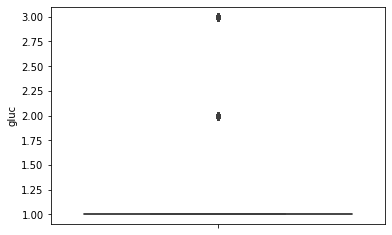

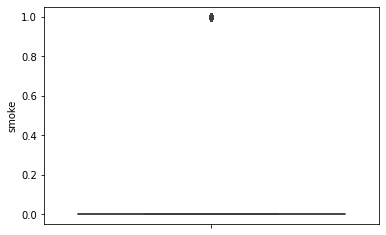

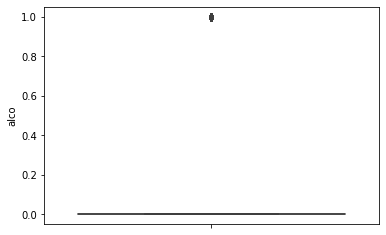

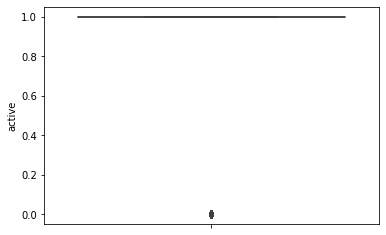

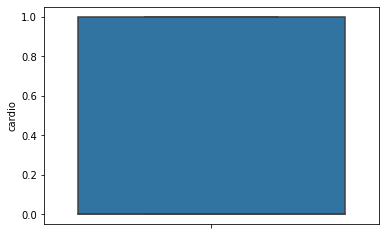

In [12]:
#show boxplots for all attributes
for i in labels:
    sns.boxplot( y=data_df[i] );
    plt.show()

- not useful plots:
    - id, because the ID has nothing to do with the potential of an disea
    - ? binary attributes -> why do gender & cardio look so different from smoke & alcohol?

### Vionlinplots for all attributes

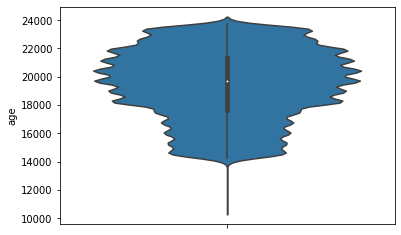

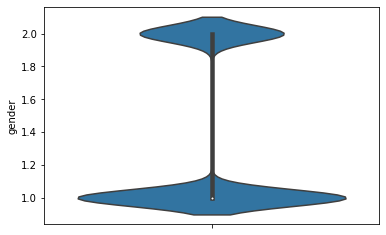

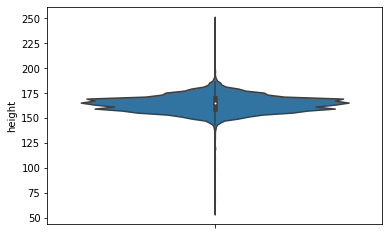

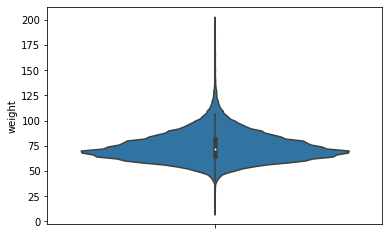

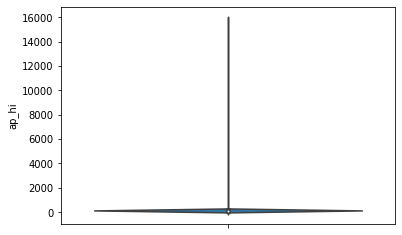

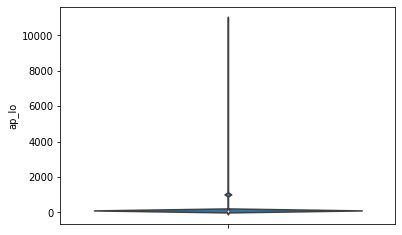

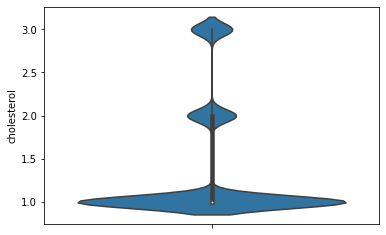

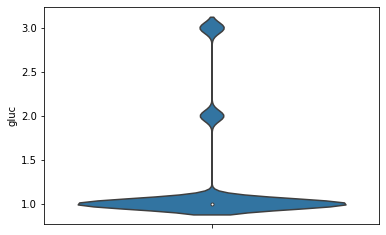

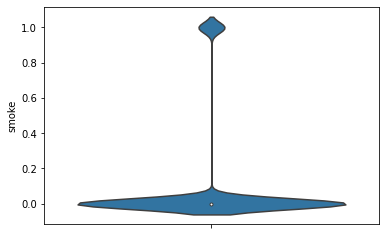

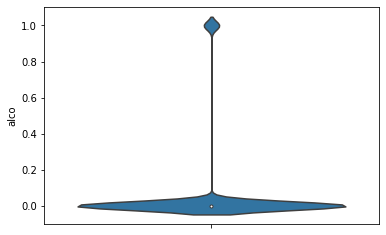

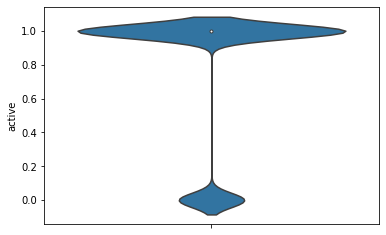

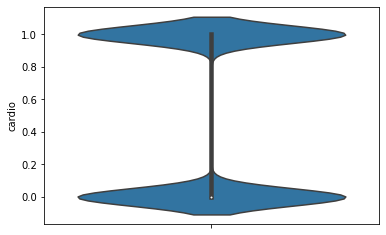

In [13]:
#show violinplots for all attributes
for i in labels:
    sns.violinplot(y=data_df[i] );
    plt.show()

Observations:
- gender: more women than men
- height, weight, and bloodpressure -> outliers
- most people have a normal cholesterol and glucose value
- most people don't smoke and dring 
- most people are physically active
- cardio: dataset is equally distributed

### Remove some outliers to explore only relevant data

In [14]:
# outlier handling
# remove extreme cases of height, weight and blood pressure (height, weight, ap_hi, ap_lo)
data_df = data_df[data_df['height'] > 150]
data_df = data_df[data_df['height'] < 250]
data_df = data_df[data_df['weight'] > 35]
data_df = data_df[data_df['weight'] < 250]

# normal systolic blood pressure ranges from ~80 to ~120 but values till 240 are imaginable 
data_df = data_df[data_df['ap_hi'] > 40]
data_df = data_df[data_df['ap_hi'] < 240]

# normal diastolic blood pressure ranges from ~40 to ~80  but values till 220 are imaginable
data_df = data_df[data_df['ap_lo'] > 20]
data_df = data_df[data_df['ap_lo'] < 220]

# systolic blood pressure should always be higher then diastolic
data_df = data_df[data_df['ap_lo'] < data_df['ap_hi']]

### Review dataset without outliers

In [15]:
#dataset without the outliers
data_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000,66129.000000
mean,19440.234133,1.359872,165.053244,74.439779,126.613634,81.292867,1.360825,1.225181,0.090520,0.054363,0.802931,0.493339
std,2467.950400,0.479966,7.268476,14.186129,16.564223,9.411361,0.676385,0.571124,0.286928,0.226735,0.397788,0.499959
min,10798.000000,1.000000,151.000000,37.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17629.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19688.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21304.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,207.000000,200.000000,230.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Drop attributes without changes

In [16]:
#labels of attributes something changed due to outlier handling
labels_new = labels.drop(['age','gender','cholesterol','gluc','smoke','alco','active','cardio'])
data_df_new = data_df.drop(['age','gender','cholesterol','gluc','smoke','alco','active','cardio'],axis=1)

### Boxplots for attributes without outliers 

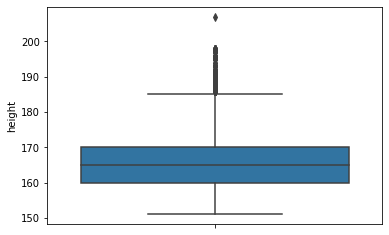

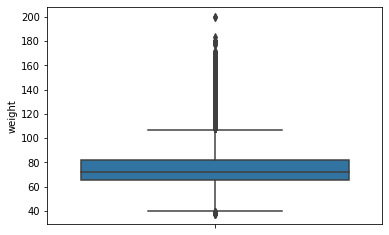

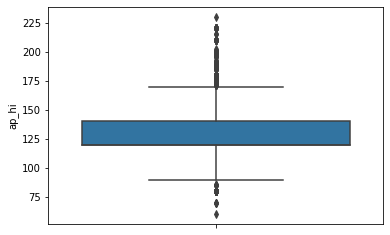

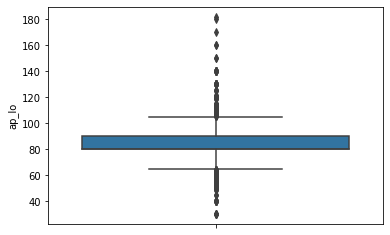

In [17]:
#show boxplots for attributes without outliers
for i in labels_new:
    sns.boxplot( y=data_df_new[i] );
    plt.show()

### Violineplots for attributes without outliers

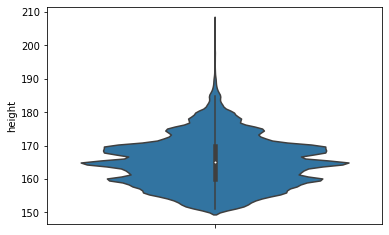

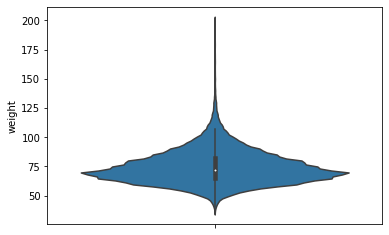

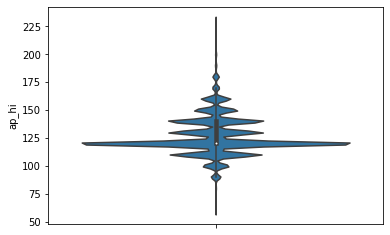

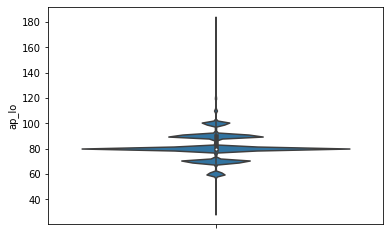

In [18]:
#show violinplots for attributes without outliers
for i in labels_new:
    sns.violinplot(y=data_df_new[i] );
    plt.show()